In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The ETFS we'll use for this analysis
etf_ticker_list = ['VOO', 'SCHZ', 'VEU', 'VNQ']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in etf_ticker_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [VOO, SCHZ, VEU, VNQ]
company_name = ["Vanguard S&P500", "Schwab Aggregate Bond", "Vanguard All World non US", "Vanguard REIT ETF"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-05,84.199997,85.099998,83.430000,84.570000,84.570000,5766400,Vanguard REIT ETF
2023-07-06,83.459999,84.019997,82.360001,83.919998,83.919998,5609000,Vanguard REIT ETF
2023-07-07,83.500000,84.269997,83.320000,83.730003,83.730003,5865300,Vanguard REIT ETF
2023-07-10,83.470001,84.160004,83.239998,84.089996,84.089996,3855600,Vanguard REIT ETF
2023-07-11,84.320000,85.339996,84.120003,85.290001,85.290001,4039500,Vanguard REIT ETF
2023-07-12,86.440002,86.550003,85.669998,85.750000,85.750000,5361600,Vanguard REIT ETF
2023-07-13,85.739998,86.320000,85.260002,86.300003,86.300003,5067100,Vanguard REIT ETF
2023-07-14,85.980003,86.190002,85.580002,86.129997,86.129997,5618100,Vanguard REIT ETF
2023-07-17,85.910004,86.230003,85.410004,85.570000,85.570000,5610700,Vanguard REIT ETF


In [59]:
VOO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,369.866096,372.475897,367.451595,370.178048,366.745529,4.027606e+06
std,18.194525,17.738660,18.901195,18.496758,19.422633,1.226292e+06
min,320.839996,330.579987,319.869995,327.640015,323.469971,1.423400e+06
25%,358.829987,362.634995,356.339996,359.490005,354.669601,3.210200e+06
50%,369.339996,371.480011,365.989990,368.660004,365.093353,3.775300e+06
75%,379.339996,381.475006,377.304993,379.854996,377.496262,4.606300e+06
max,413.940002,417.929993,413.540009,417.350006,417.350006,1.049150e+07


In [60]:
VOO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-19 to 2023-07-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


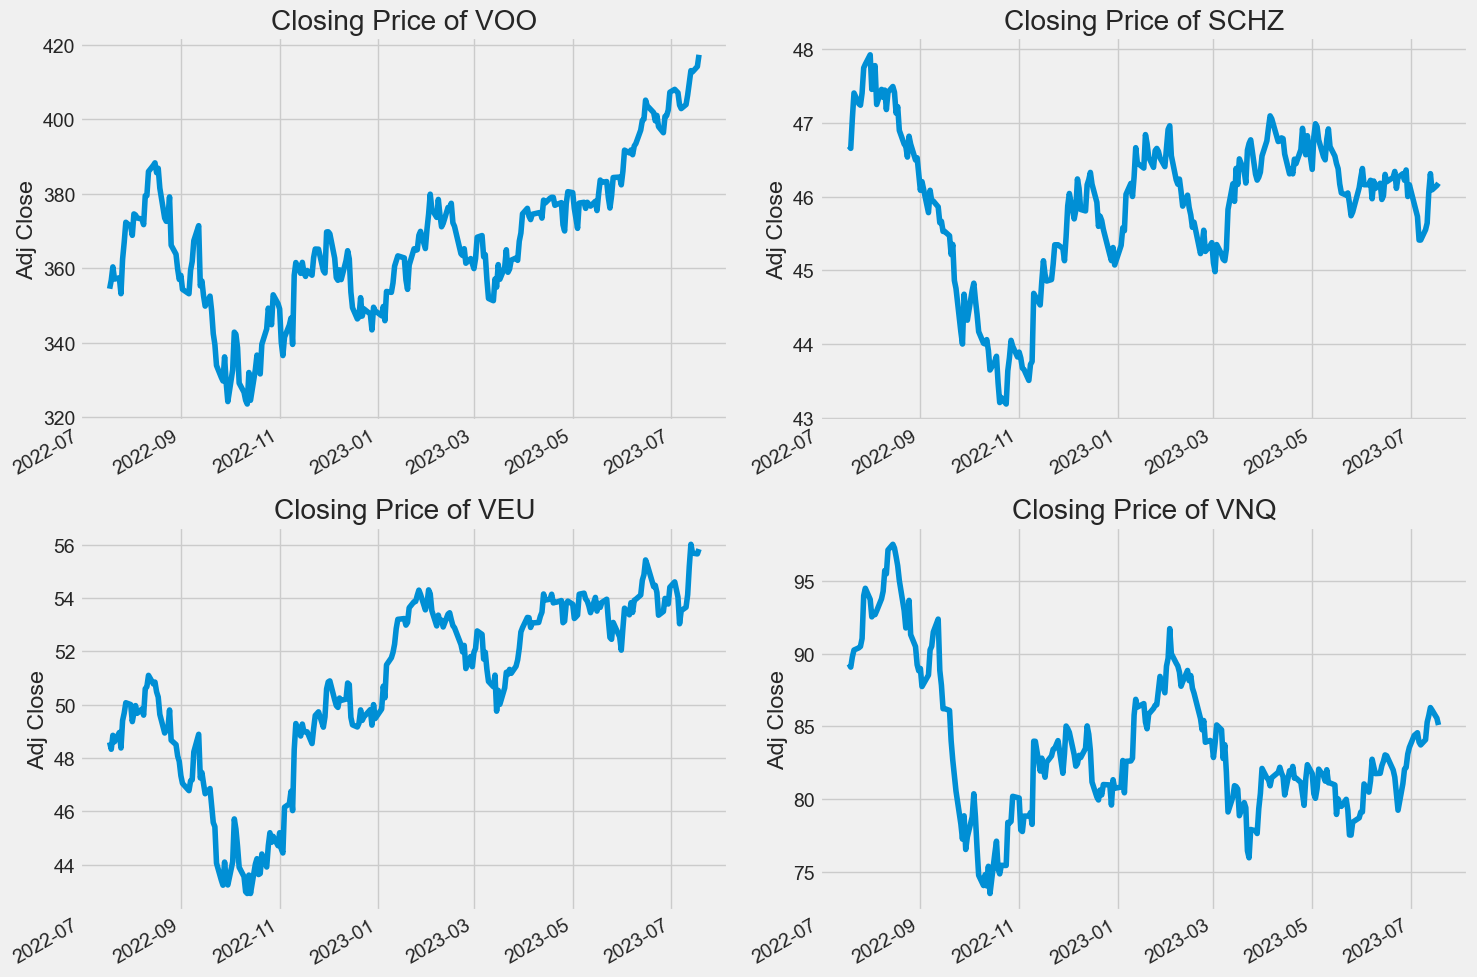

In [61]:
# Historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {etf_ticker_list[i - 1]}")
    
plt.tight_layout()

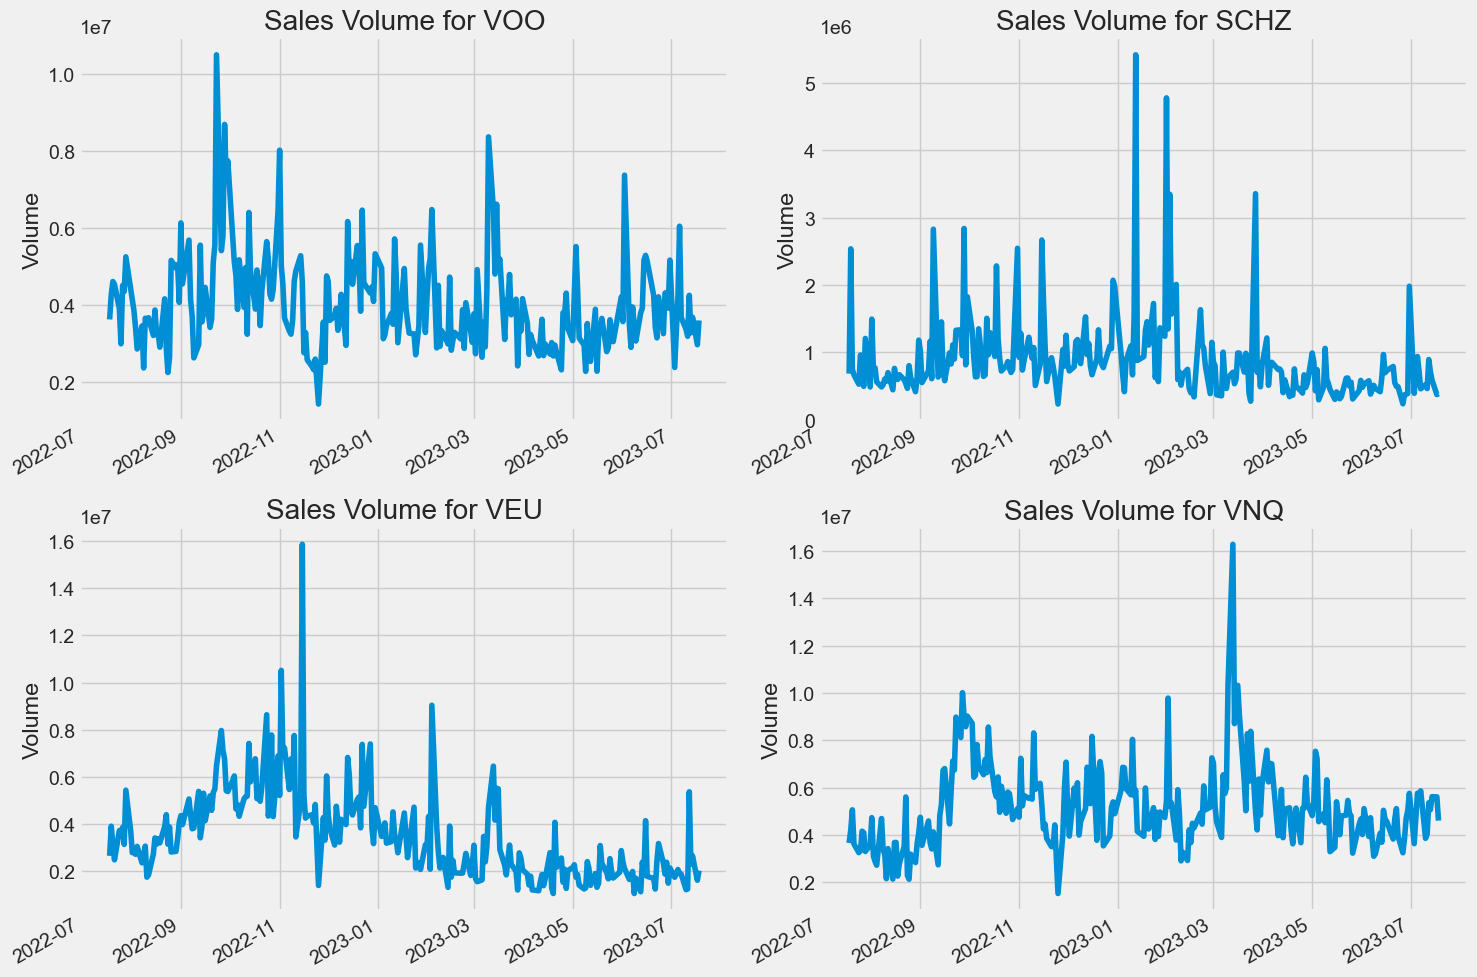

In [62]:
# Plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {etf_ticker_list[i - 1]}")
    
plt.tight_layout()

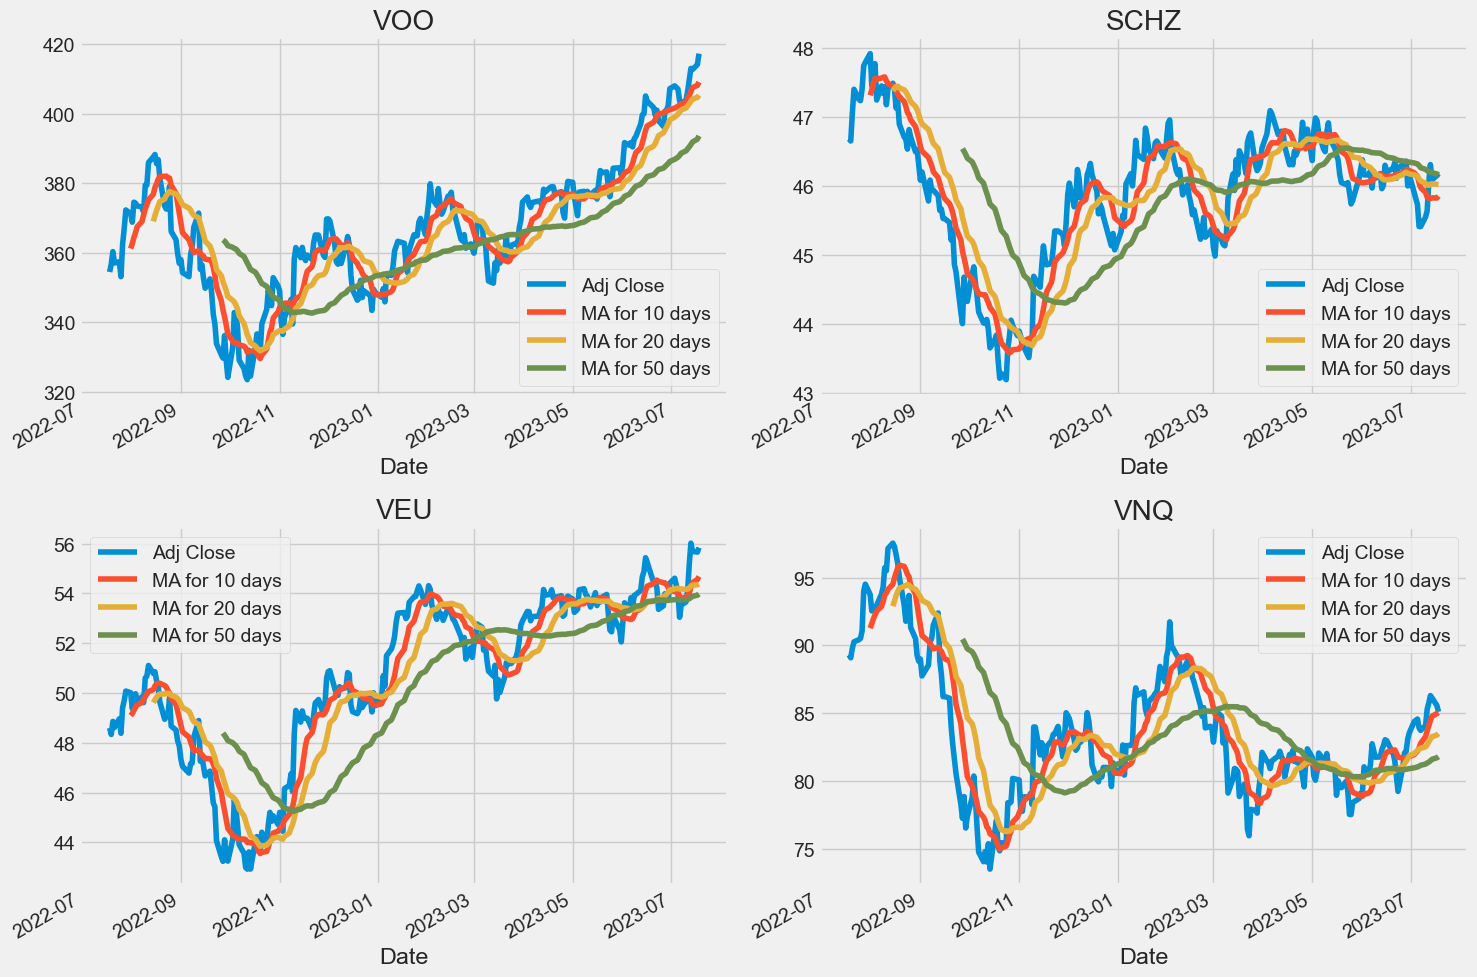

In [63]:
# Plot 10, 20, 50 day moving averages
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VOO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('VOO')

SCHZ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SCHZ')

VEU[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('VEU')

VNQ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('VNQ')

fig.tight_layout()

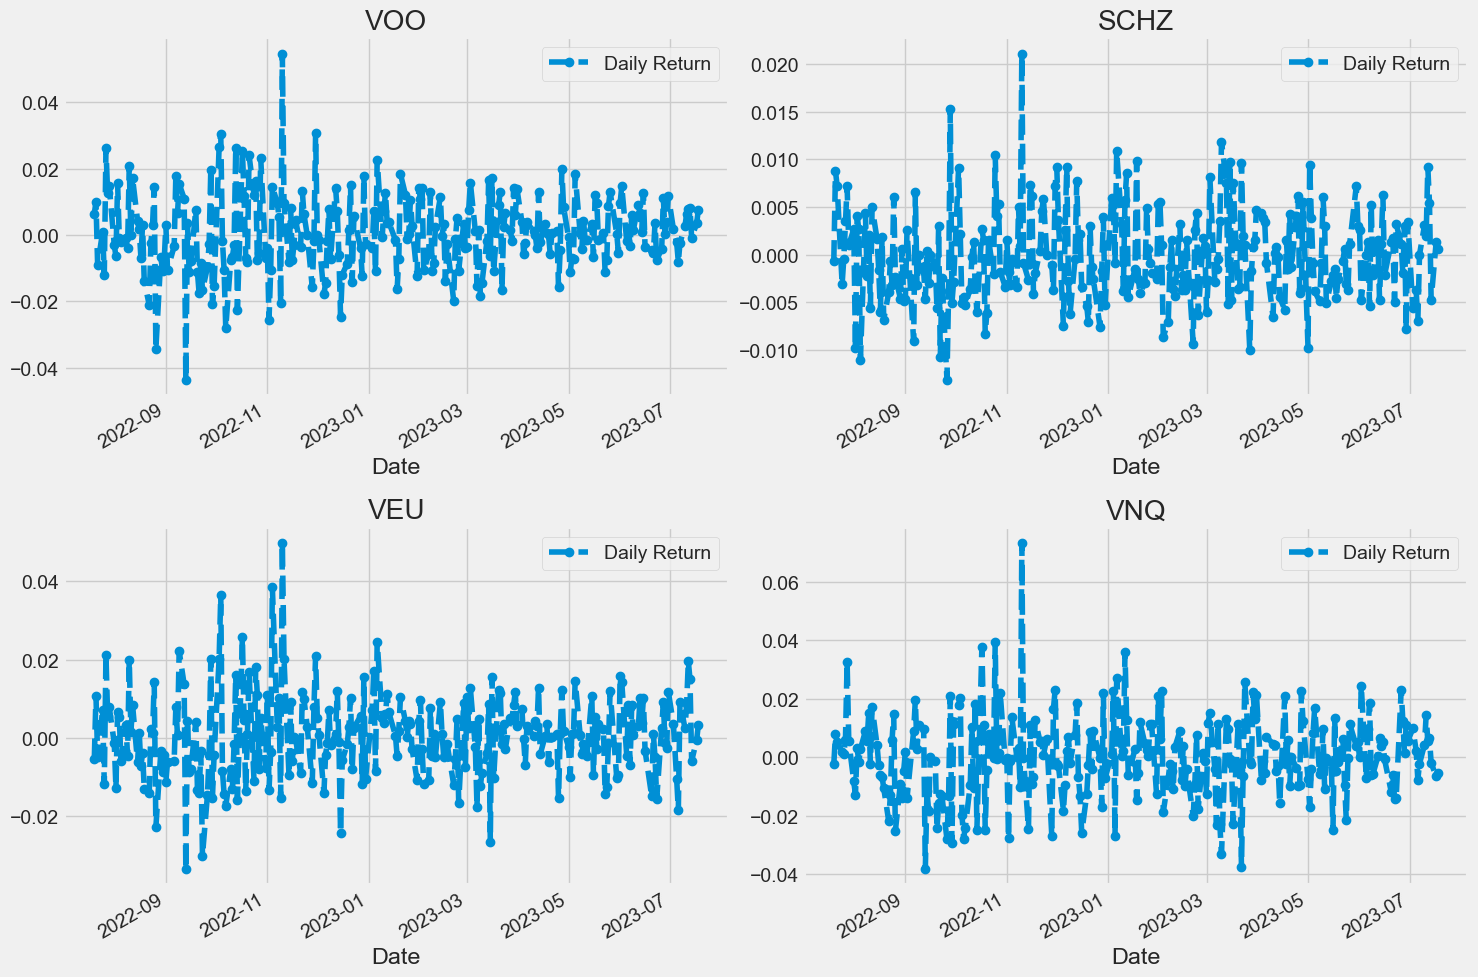

In [64]:
# Use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VOO['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('VOO')

SCHZ['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('SCHZ')

VEU['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('VEU')

VNQ['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('VNQ')

fig.tight_layout()

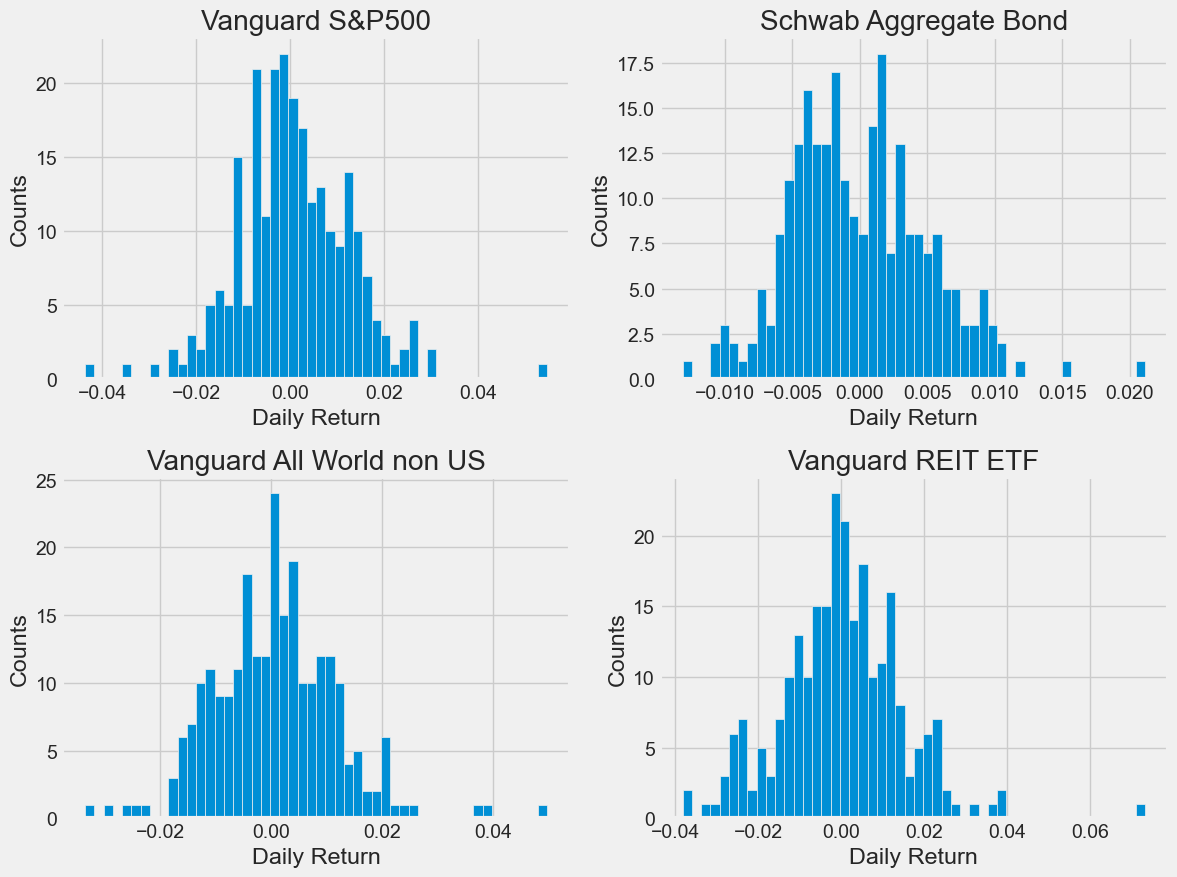

In [65]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


In [66]:
closing_df = pdr.get_data_yahoo(etf_ticker_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


,SCHZ,VEU,VNQ,VOO
Date,,,,
2022-07-19,NaN,NaN,NaN,NaN
2022-07-20,-0.000626,-0.005387,-0.002353,0.006406
2022-07-21,0.008772,0.010833,0.007933,0.010113
2022-07-22,0.007246,-0.004961,0.005212,-0.009111
2022-07-25,-0.003083,0.007180,0.001693,0.000991


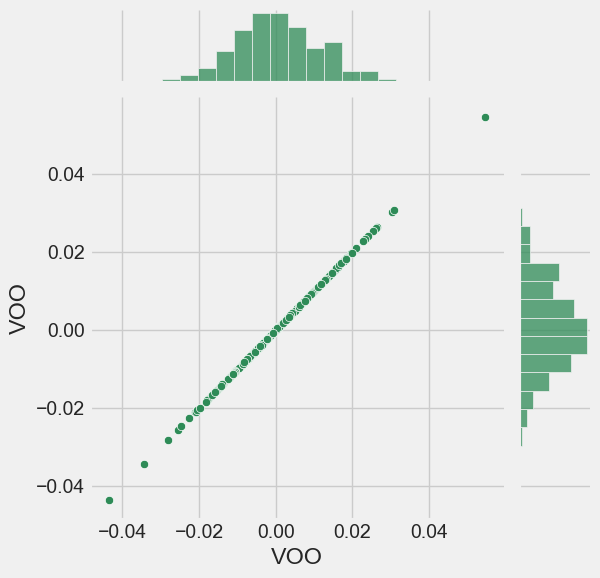

In [67]:
sns.jointplot(x='VOO', y='VOO', data=tech_rets, kind='scatter', color='seagreen')

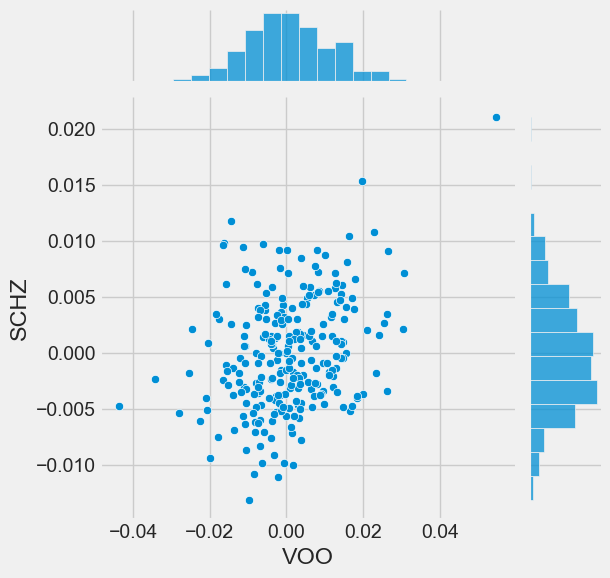

In [68]:
sns.jointplot(x='VOO', y='SCHZ', data=tech_rets, kind='scatter')


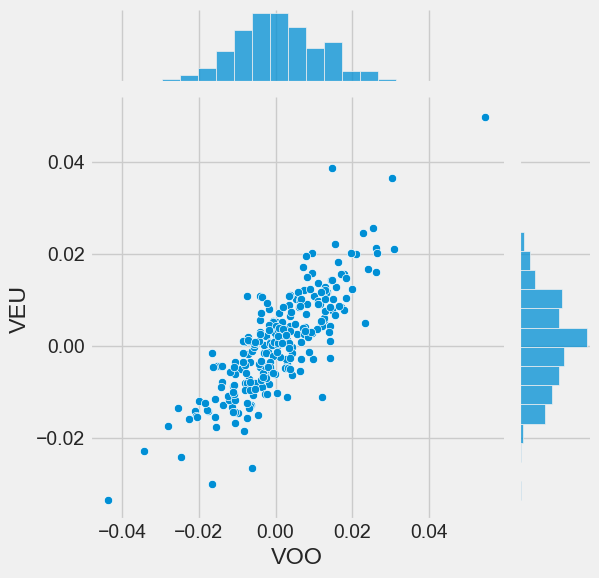

In [69]:
sns.jointplot(x='VOO', y='VEU', data=tech_rets, kind='scatter')


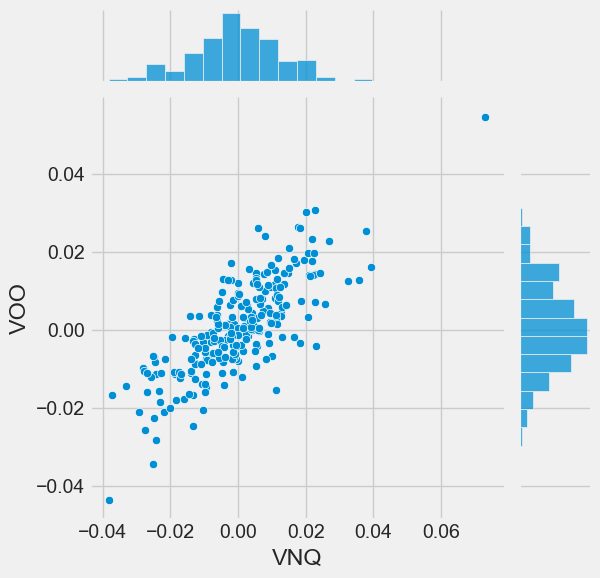

In [70]:
sns.jointplot(x='VNQ', y='VOO', data=tech_rets, kind='scatter')


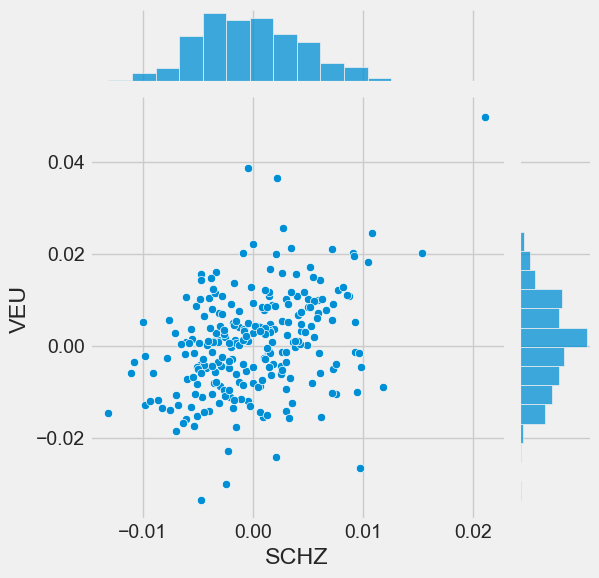

In [71]:
sns.jointplot(x='SCHZ', y='VEU', data=tech_rets, kind='scatter')


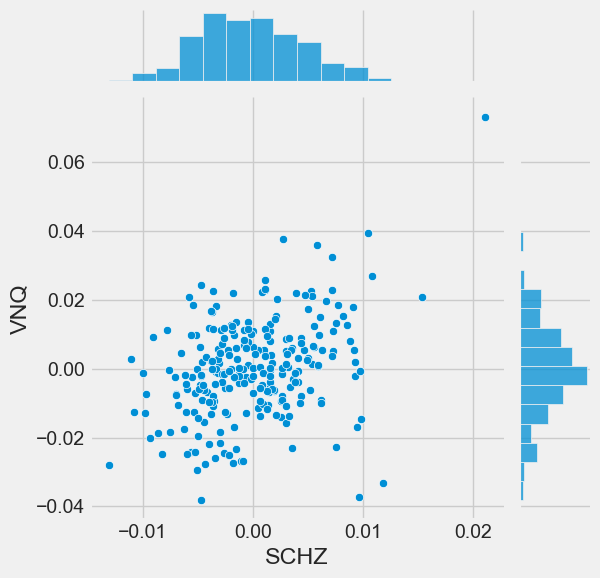

In [72]:
sns.jointplot(x='SCHZ', y='VNQ', data=tech_rets, kind='scatter')

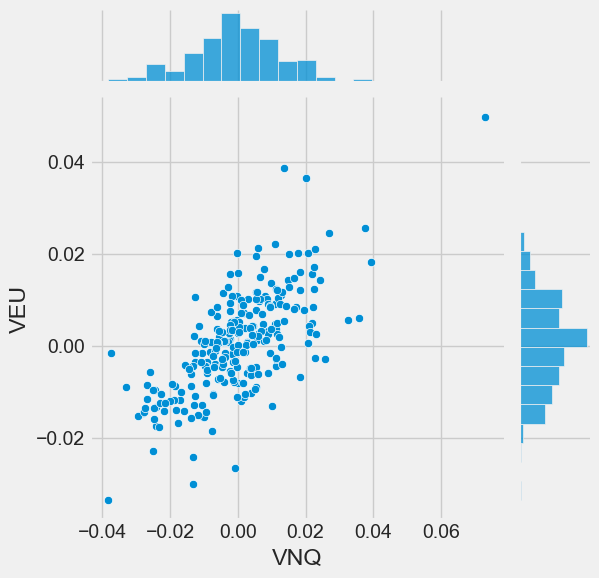

In [73]:
sns.jointplot(x='VNQ', y='VEU', data=tech_rets, kind='scatter')

/Users/willhawkins/anaconda3/envs/DataScience3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


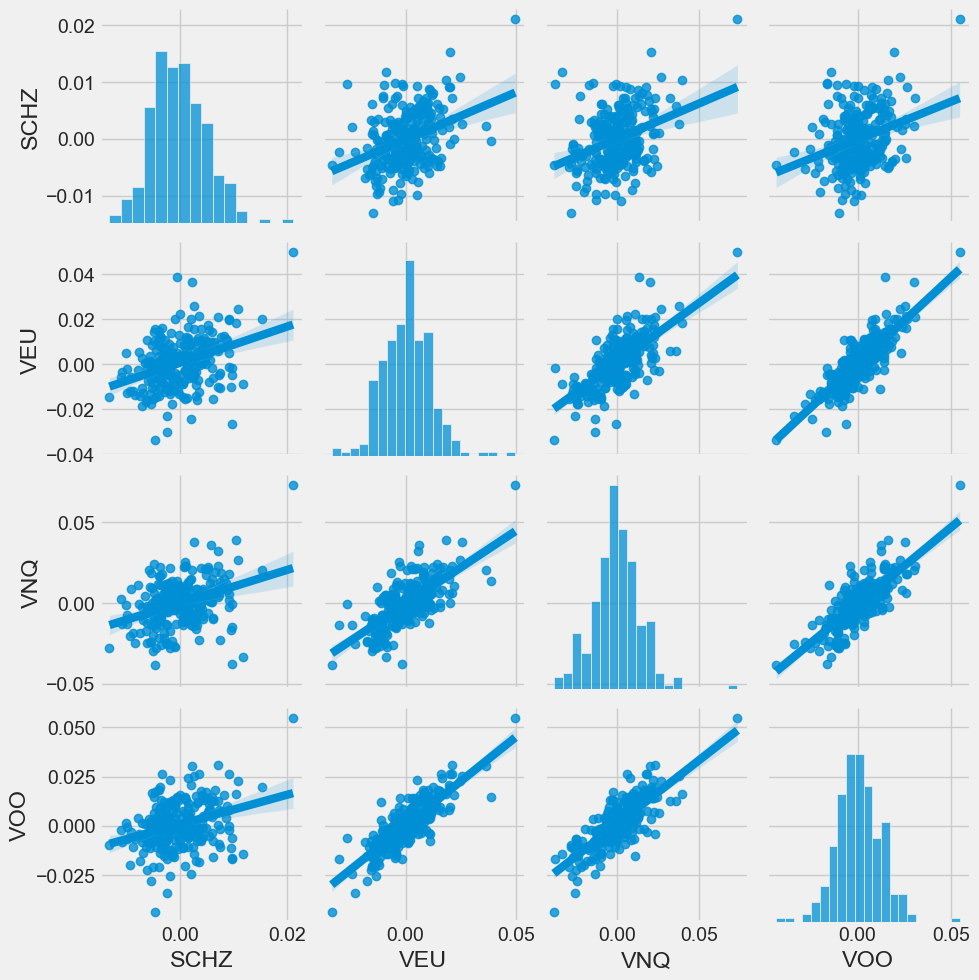

In [74]:
sns.pairplot(tech_rets, kind='reg')

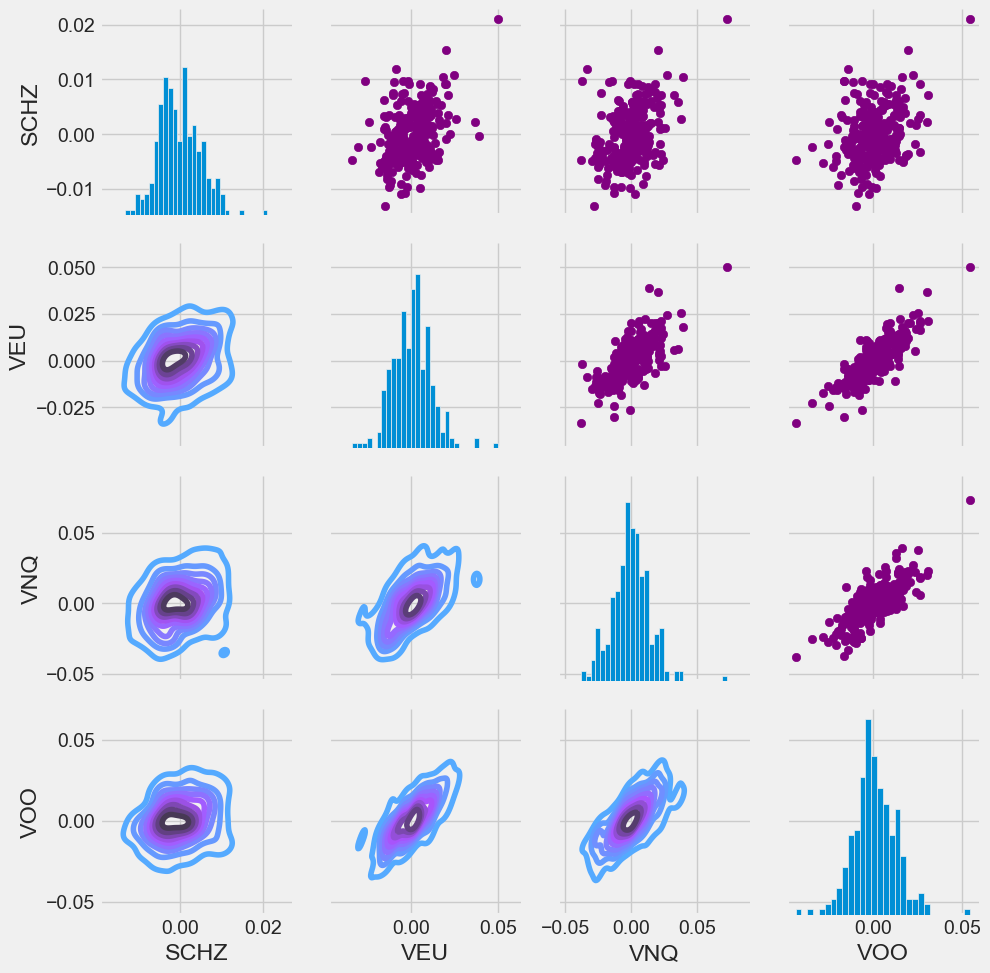

In [75]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of ETF closing prices')

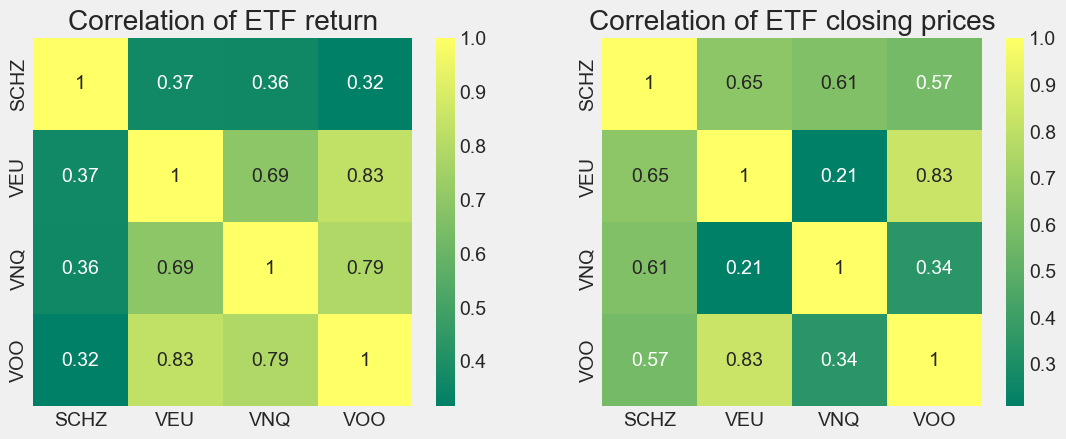

In [76]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of ETF return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of ETF closing prices')

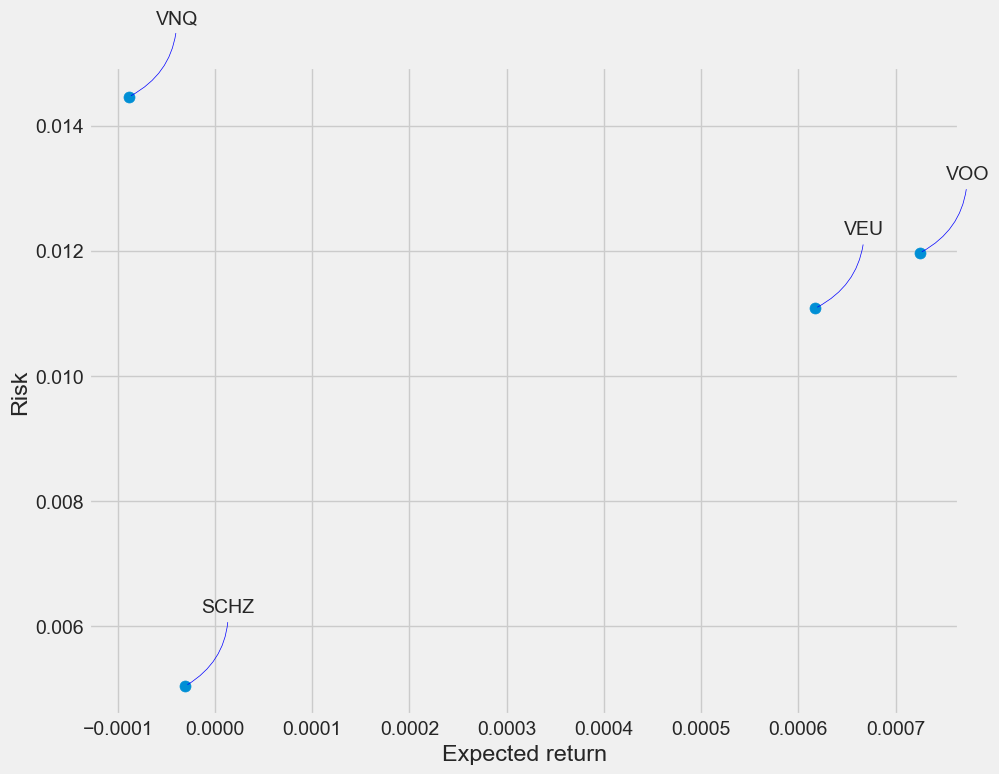

In [77]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [136]:
voodata = pdr.get_data_yahoo("VOO", start="2017-01-01", end= datetime.now())
voodata['ETF Name'] = 'VOO'
voodata['Tomorrows Volume'] = voodata['Volume'].shift(periods=-1)
voodata['Tomorrows Price Movement'] = np.where(voodata['Close'] < voodata['Close'].shift(periods=-1), 1 , 0)

schzdata = pdr.get_data_yahoo("SCHZ", start="2017-01-01", end= datetime.now())
schzdata['ETF Name'] = 'SCHZ'
schzdata['Tomorrows Volume'] = schzdata['Volume'].shift(periods=-1)
schzdata['Tomorrows Price Movement'] = np.where(schzdata['Close'] < schzdata['Close'].shift(periods=-1), 1 , 0)

vnqdata = pdr.get_data_yahoo("VNQ", start="2017-01-01", end= datetime.now())
vnqdata['ETF Name'] = 'VNQ'
vnqdata['Tomorrows Volume'] = vnqdata['Volume'].shift(periods=-1)
vnqdata['Tomorrows Price Movement'] = np.where(vnqdata['Close'] < vnqdata['Close'].shift(periods=-1), 1 , 0)

veudata = pdr.get_data_yahoo("VEU", start="2017-01-01", end= datetime.now())
veudata['ETF Name'] = 'VEU'
veudata['Tomorrows Volume'] = veudata['Volume'].shift(periods=-1)
veudata['Tomorrows Price Movement'] = np.where(veudata['Close'] < veudata['Close'].shift(periods=-1), 1 , 0)

four_etf_df = pd.concat([voodata, schzdata, vnqdata, veudata], ignore_index = False)
four_etf_df.to_csv('ETFportfolioDiversity.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [137]:
four_etf_df

,Open,High,Low,Close,Adj Close,Volume,ETF Name,Tomorrows Volume,Tomorrows Price Movement
Date,,,,,,,,,
2017-01-03,206.679993,207.330002,205.559998,206.740005,184.229111,4750200,VOO,4622400.0,1
2017-01-04,207.199997,208.179993,207.119995,207.960007,185.316269,4622400,VOO,2772100.0,0
2017-01-05,207.750000,208.039993,207.009995,207.800003,185.173691,2772100,VOO,2194600.0,1
2017-01-06,207.990005,209.089996,207.399994,208.610001,185.895493,2194600,VOO,1705200.0,0
2017-01-09,208.339996,208.479996,207.889999,207.949997,185.307358,1705200,VOO,2189400.0,0
...,...,...,...,...,...,...,...,...,...
2023-07-12,54.830002,55.230000,54.799999,55.189999,55.189999,5370000,VEU,2300000.0,1
2023-07-13,55.720001,56.080002,55.720001,56.020000,56.020000,2300000,VEU,2653500.0,0
2023-07-14,55.950001,55.959999,55.650002,55.689999,55.689999,2653500,VEU,1620500.0,0
